## Understanding the BayesSS Policy

In [1]:
using Distributions, PyPlot

In [25]:
kl_(pi::Real, qi::Real) = pi > 0 ? pi * log(pi/qi): 0.

#one dim KL diveregence
kl(p::Real, q::Real) = kl_(p, q) + kl_(1-p, 1-q)
#kl(p, qs) = sum(kl(ps[i], qs[i]) for i = 1:length(ps))

kl (generic function with 1 method)

In [87]:
N = 5

#p1 and p2 do not need to sum to 1
# represent the probability = 1
p1 = .1
p2 = .7

#srand(8673319)
# l_ix = rand() > .5
# qhat = rand(Binomial(N, l_ix > 0 ? p1 : p2))/N

function q_bayes(N, qhat, p1, p2)
    out = p1 * exp(-N * kl(qhat, p1)) + p2 * exp(-N * kl(qhat, p2)) 
    out/ (exp(-N * kl(qhat, p1)) + exp(-N * kl(qhat, p2)) ) 
end



function rand_qhats(numReps, N, p1, p2)
    out = zeros(numReps)
    for ix = 1:numReps
        out[ix] = rand(Binomial(N, rand() > .5 ? p1 : p2))/N
    end
    out       
end



rand_qhats (generic function with 1 method)

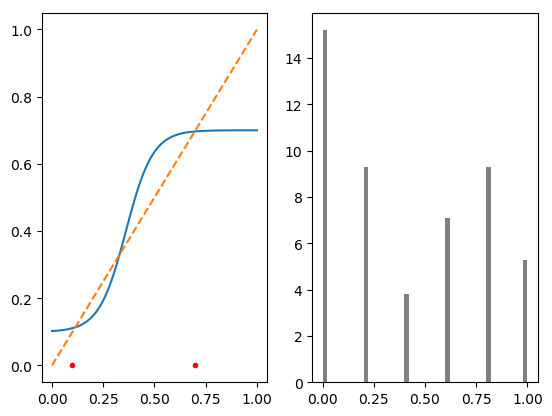

([15.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  9.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.3], [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18  …  0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x140163150>, PyObject <matplotlib.patches.Rectangle object at 0x140157ed0>, PyObject <matplotlib.patches.Rectangle object at 0x140163450>, PyObject <matplotlib.patches.Rectangle object at 0x140163810>, PyObject <matplotlib.patches.Rectangle object at 0x140163b50>, PyObject <matplotlib.patches.Rectangle object at 0x140163ed0>, PyObject <matplotlib.patches.Rectangle object at 0x14016f290>, PyObject <matplotlib.patches.Rectangle object at 0x14016f610>, PyObject <matplotlib.patches.Rectangle object at 0x14016f990>, PyObject <matplotlib.patches.Rectangle object at 0x14016fd10>  …  PyObject <matplotlib.patches.Rectangle object at 0x1401c5b50>, PyObject <matplotlib.patches.Rectangle object at 0x1401c5ed0

In [88]:
qhats = linspace(0, 1, 100)
out = map(q -> q_bayes(N, q, p1, p2), qhats)
sample = rand_qhats(500, N, p1, p2)

fig, ax = subplots(1, 2)
ax[1,1][:plot](qhats, out)
ax[1,1][:plot](qhats, qhats, "--")
ax[1,1][:plot](p1, 0, ".r")
ax[1,1][:plot](p2, 0, ".r")
# axhline(p1, linestyle="dotted", color="black")
# axhline(p2, linestyle="dotted", color="black")
ax[2,1][:hist](sample, 50, density=true, color="grey")

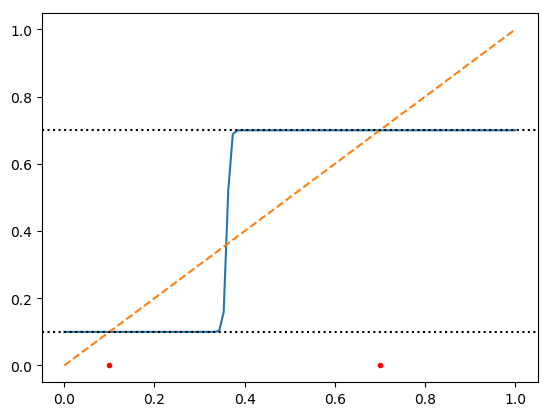

PyObject <matplotlib.lines.Line2D object at 0x1389a07d0>

In [43]:
qhats = linspace(0, 1, 100)
out = map(q -> q_bayes(N, q, p1, p2), qhats)
plot(qhats, out)
plot(qhats, qhats, "--")
plot(p1, 0, ".r")
plot(p2, 0, ".r")
axhline(p1, linestyle="dotted", color="black")
axhline(p2, linestyle="dotted", color="black")